# Rf 2 0 4A_Extrangefit_ Roo Add Pdf
 'ADDITION AND CONVOLUTION' RooFit tutorial macro #204a

 Extended maximum likelihood fit in multiple ranges.
 When an extended pdf and multiple ranges are used, the
 RooExtendPdf cannot correctly interpret the coefficients
 used for extension.
 This can be solved by using a RooAddPdf for extending the model.



**Author:** 12/2018 - Stephan Hageboeck   
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:44 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooDataSet.h"
#include "RooGaussian.h"
#include "RooChebychev.h"
#include "RooAddPdf.h"
#include "RooExtendPdf.h"
#include "RooFitResult.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "RooPlot.h"
using namespace RooFit ;

Setup component pdfs
 ---------------------------------------

Declare observable x

In [2]:
RooRealVar x("x","x",0,11) ;


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create two gaussian pdfs g1(x,mean1,sigma) anf g2(x,mean2,sigma) and their parameters

In [3]:
RooRealVar mean("mean","mean of gaussians",5) ;
RooRealVar sigma1("sigma1","width of gaussians",0.5) ;
RooRealVar sigma2("sigma2","width of gaussians",1) ;

RooGaussian sig1("sig1","Signal component 1",x,mean,sigma1) ;  
RooGaussian sig2("sig2","Signal component 2",x,mean,sigma2) ;  

Build chebychev polynomial p.d.f.  

In [4]:
RooRealVar a0("a0","a0",0.5,0.,1.) ;
RooRealVar a1("a1","a1",0.2,0.,1.) ;
RooChebychev bkg("bkg","Background",x,RooArgSet(a0,a1)) ;

Sum the signal components into a composite signal p.d.f.

In [5]:
RooRealVar sig1frac("sig1frac","fraction of component 1 in signal",0.8,0.,1.) ;
RooAddPdf sig("sig","Signal",RooArgList(sig1,sig2),sig1frac) ;

Extend the pdfs
 -----------------------------

Define signal range in which events counts are to be defined

In [6]:
x.setRange("signalRange",4,6) ;

[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'signalRange' created with bounds [4,6]


Associated nsig/nbkg as expected number of events with sig/bkg _in_the_range_ "signalrange"

In [7]:
RooRealVar nsig("nsig","number of signal events in signalRange",500,0.,10000) ;
RooRealVar nbkg("nbkg","number of background events in signalRange",500,0,10000) ;

Use addpdf to extend the model. giving as many coefficients as pdfs switches
 on extension.

In [8]:
RooAddPdf  model("model","(g1+g2)+a", RooArgList(bkg,sig), RooArgList(nbkg,nsig)) ;

Sample data, fit model
 -------------------------------------------

Generate 1000 events from model so that nsig,nbkg come out to numbers <<500 in fit

In [9]:
RooDataSet *data = model.generate(x,1000) ;



auto canv = new TCanvas("Canvas", "Canvas", 1500, 600);
canv->Divide(3,1);

Fit full range
 -------------------------------------------

In [10]:
canv->cd(1);

Perform unbinned ml fit to data, full range

Important:
 The model needs to be copied when fitting with different ranges because
 the interpretation of the coefficients is tied to the fit range
 that's used in the first fit

In [11]:
RooAddPdf model1(model);
RooFitResult* r = model1.fitTo(*data,Save()) ;
r->Print() ;

RooPlot * frame = x.frame(Title("Full range fitted"));
data->plotOn(frame);
model1.plotOn(frame, VisualizeError(*r));
model1.plotOn(frame);
model1.paramOn(frame);
frame->Draw();

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (sig1,sig2)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (bkg)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a0           5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 a1           2.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     3 nbkg         5.00000e+02  2.50000e+02    0.00000e+00  1.00000e+04
     4 nsig         5.00000e+02  2.50000e+02    0.00000e+00  1.00000e+04
     5 sig1frac     8.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
 **********
 **    3 **SET ER

Fit in two regions
 -------------------------------------------

In [12]:
canv->cd(2);
x.setRange("left",  0., 4.);
x.setRange("right", 6., 10.);

RooAddPdf model2(model);
RooFitResult* r2 = model2.fitTo(*data,
   Range("left,right"),
   Save()) ;
r2->Print();


RooPlot * frame2 = x.frame(Title("Fit in left/right sideband"));
data->plotOn(frame2);
model2.plotOn(frame2, VisualizeError(*r2));
model2.plotOn(frame2);
model2.paramOn(frame2);
frame2->Draw();

[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'left' created with bounds [0,4]
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'right' created with bounds [6,10]
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_modelData_left) constructing test statistic for sub-range named left
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'NormalizationRangeForleft' created with bounds [0,11]
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'fit_nll_model_modelData_left' created with bounds [0,4]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_modelData_left) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_modelData_right) constructing test statistic for sub-range named right
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'N

Fit in one region
 -------------------------------------------
 Note how restricting the region to only the left tail increases
 the fit uncertainty

[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'leftToMiddle' created with bounds [0,5]
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_modelData) constructing test statistic for sub-range named leftToMiddle
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'NormalizationRangeForleftToMiddle' created with bounds [0,11]
[#1] INFO:Eval -- RooRealVar::setRange(x) new range named 'fit_nll_model_modelData' created with bounds [0,5]
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_modelData) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (sig1,sig2)
[#1] INFO:Minization --  The following expressions will be

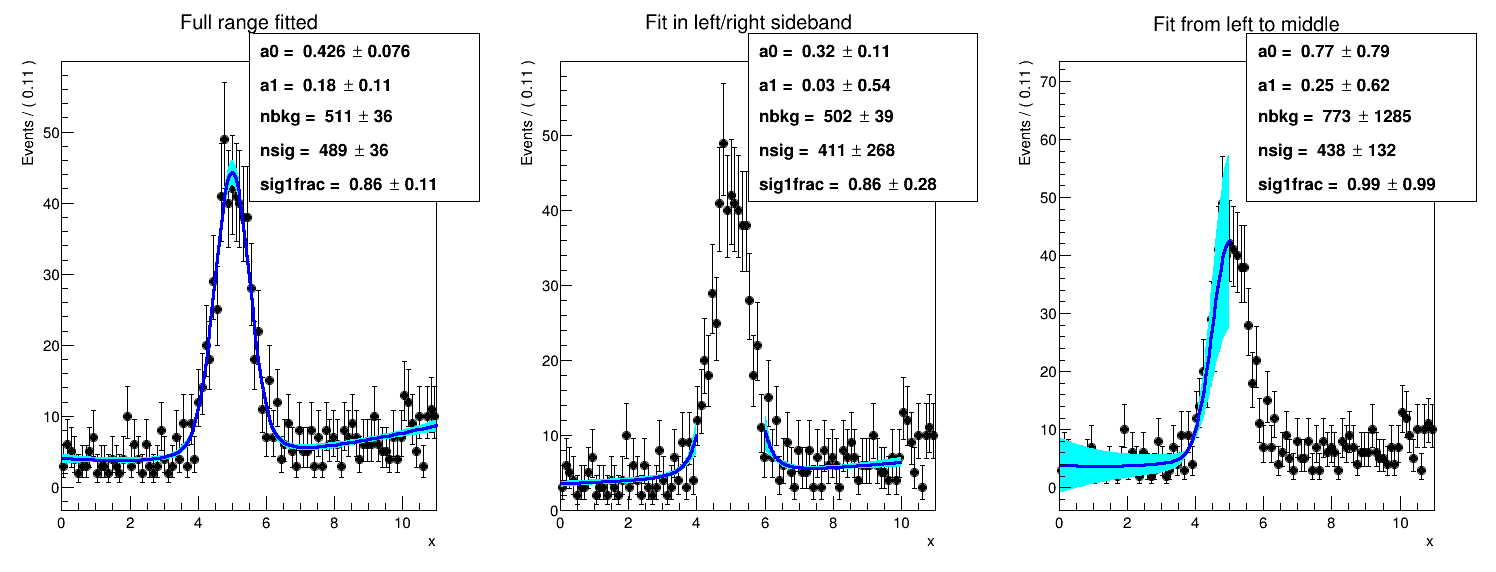

In [13]:
canv->cd(3);
x.setRange("leftToMiddle",  0., 5.);

RooAddPdf model3(model);
RooFitResult* r3 = model3.fitTo(*data,
   Range("leftToMiddle"),
   Save()) ;
r3->Print();


RooPlot * frame3 = x.frame(Title("Fit from left to middle"));
data->plotOn(frame3);
model3.plotOn(frame3, VisualizeError(*r3));
model3.plotOn(frame3);
model3.paramOn(frame3);
frame3->Draw();

canv->Draw();

Draw all canvases 

In [14]:
%jsroot on
gROOT->GetListOfCanvases()->Draw()